# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


747

In [6]:
#AGP TEST - what are our cities?
cities

['ushuaia',
 'ponta do sol',
 'kaitangata',
 'emba',
 'barrow',
 'cherskiy',
 'port alfred',
 'butaritari',
 'ribeira grande',
 'fairbanks',
 'naryan-mar',
 'busselton',
 'upernavik',
 'palmer',
 'oistins',
 'vaini',
 'castlemaine',
 'nikolskoye',
 'amahai',
 'mataura',
 'hobart',
 'camacha',
 'clyde river',
 'mahebourg',
 'grootfontein',
 'lebu',
 'yellowknife',
 'saint-philippe',
 'isangel',
 'quang ngai',
 'korla',
 'barentsburg',
 'hammerfest',
 'hithadhoo',
 'hamilton',
 'jamestown',
 'lethem',
 'arraial do cabo',
 'roma',
 'fort payne',
 'nguiu',
 'qovlar',
 'langarud',
 'hermanus',
 'thompson',
 'nizwa',
 'sitka',
 'mar del plata',
 'new norfolk',
 'gwanda',
 'tayturka',
 'tiksi',
 'taoudenni',
 'ningbo',
 'luderitz',
 'abeche',
 'tasiilaq',
 'okato',
 'tarhunah',
 'yar-sale',
 'saint-leu',
 'sinnamary',
 'segou',
 'saskylakh',
 'kapaa',
 'kudahuvadhoo',
 'rikitea',
 'ranong',
 'bilibino',
 'punta arenas',
 'safford',
 'lang son',
 'yulara',
 'magistralnyy',
 'novoilinsk',
 'rio

In [7]:
#Create a smaller list to test code with
city_short = cities[0:10]
city_short

['ushuaia',
 'ponta do sol',
 'kaitangata',
 'emba',
 'barrow',
 'cherskiy',
 'port alfred',
 'butaritari',
 'ribeira grande',
 'fairbanks']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#check out what a single entry looks like: 
params = {"appid": weather_api_key, 
          "q": "sidney",
          "units": "imperial" 
}
url = "https://api.openweathermap.org/data/2.5/weather"

# Run a request to endpoint and convert result to json
sidney_data = requests.get(url, params=params).json()

# Print the json
print(sidney_data)

{'coord': {'lon': 151.21, 'lat': -33.87}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 201, 'main': 'Thunderstorm', 'description': 'thunderstorm with rain', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 62.73, 'feels_like': 60.44, 'temp_min': 62.01, 'temp_max': 64, 'pressure': 1009, 'humidity': 82}, 'visibility': 9000, 'wind': {'speed': 8.05, 'deg': 180}, 'rain': {'1h': 0.23}, 'clouds': {'all': 75}, 'dt': 1604127243, 'sys': {'type': 1, 'id': 9600, 'country': 'AU', 'sunrise': 1604084138, 'sunset': 1604132506}, 'timezone': 39600, 'id': 2147714, 'name': 'Sydney', 'cod': 200}


In [10]:
#Get the full list of cities

cities_2 = []
lat = []
lon = []
max_temp = []
humid = []
cloud = []
wind_spd = []
country = []
dt = []
record = 0
length = len(cities)
units = "imperial"

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    
    response = requests.get(query_url+city).json()
    
    try:
        cities_2.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_spd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        
        
    except:
        print("City not found! "+ city)
        
    record += 1    
    print(f"Processing record {record} of {length}|{city}")

Processing record 1 of 747|ushuaia
Processing record 2 of 747|ponta do sol
Processing record 3 of 747|kaitangata
Processing record 4 of 747|emba
Processing record 5 of 747|barrow
Processing record 6 of 747|cherskiy
Processing record 7 of 747|port alfred
Processing record 8 of 747|butaritari
Processing record 9 of 747|ribeira grande
Processing record 10 of 747|fairbanks
Processing record 11 of 747|naryan-mar
Processing record 12 of 747|busselton
Processing record 13 of 747|upernavik
Processing record 14 of 747|palmer
Processing record 15 of 747|oistins
Processing record 16 of 747|vaini
Processing record 17 of 747|castlemaine
Processing record 18 of 747|nikolskoye
Processing record 19 of 747|amahai
Processing record 20 of 747|mataura
Processing record 21 of 747|hobart
Processing record 22 of 747|camacha
Processing record 23 of 747|clyde river
Processing record 24 of 747|mahebourg
Processing record 25 of 747|grootfontein
Processing record 26 of 747|lebu
Processing record 27 of 747|yellowk

In [38]:
#put the data into a data frame:

response_df = pd.DataFrame({ 
        'City': cities_2,
        'Lat': lat,
        'Lon': lon,
        'Max Temp': max_temp,
        'Humidity': humid,
        'Cloudiness': cloud,
        'Wind Speed': wind_spd,
        'Country': country,
        'Date': dt,
})


In [49]:
# #export the city data into a .csv
# #EXPORTING TO CSV didn't work
# #WILL ALSO NEED TO EXPORT PNGS OF GRAPHS

#From first box: output_data_file = "output_data/cities.csv"

cities.to_csv('cities.csv')

AttributeError: 'list' object has no attribute 'to_csv'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
response_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,48.20,70,75,18.34,AR,1604127427
1,Ponta do Sol,32.67,-17.10,68.00,52,0,9.17,PT,1604127428
2,Kaitangata,-46.28,169.85,53.01,91,97,8.01,NZ,1604127428
3,Emba,48.83,58.14,53.33,38,0,14.41,KZ,1604127428
4,Barrow,71.29,-156.79,3.20,84,1,8.05,US,1604127428


In [40]:
response_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,6.830000e+02
mean,21.169531,21.644246,58.821684,72.641288,52.042460,8.294568,1.604127e+09
std,32.094008,88.426668,23.109679,21.914494,41.761678,6.025942,1.019247e+02
min,-54.800000,-175.200000,-10.230000,2.000000,0.000000,0.250000,1.604127e+09
25%,-5.225000,-55.210000,42.010000,62.000000,1.000000,3.555000,1.604127e+09
50%,23.910000,26.890000,64.270000,79.000000,61.000000,6.850000,1.604127e+09
75%,49.215000,100.345000,77.780000,89.000000,97.000000,11.410000,1.604128e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,37.380000,1.604128e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#SKIPPED - no humidity over 100%

In [ ]:
##  Get the indices of cities that have humidity over 100%.

# (skipped - no humidity over 100%)

In [ ]:
## Make a new DataFrame equal to the city data to drop all humidity outliers by index.
## Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# (skipped - no humidity over 100%)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

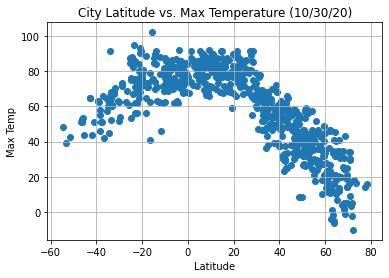

In [41]:
# LAT v TEMP

x_values = response_df['Lat']
y_values = response_df['Max Temp']
plt.scatter(x_values,y_values)
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (10/30/20)')
plt.grid(True, linestyle='-')
plt.show()

In [ ]:
# The code is plotting the latitude of cities against their max temperture
# (deg Farenhieght) at the time of sampling (10-30-2020, 11:50 pm PST). It 
# shows that the hottest part of the world is closest to the equator. 
# The recorded max temperature decreased as the city's latitude moves 
# further away from the equator.
# Additionally, cities in the Southern hemisphere have a higher average 
# Max Temperature.


## Latitude vs. Humidity Plot

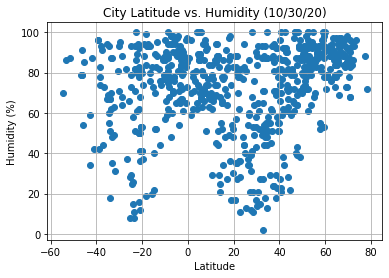

In [42]:
#LAT v HUMIDITY

x_values = response_df['Lat']
y_values = response_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/30/20)')
plt.grid(True, linestyle='-')
plt.show()

In [ ]:
# The code is plotting the latitude of cities against their humidity at 
# the time of sampling (10-30-2020, 11:50 pm PST). 
# It shows that there is higher humidity in cities near the equator. 
# Cities at higher and lower latitidues display a wide range of humidity,
# though cities close to the poles again display high humidity.

## Latitude vs. Cloudiness Plot

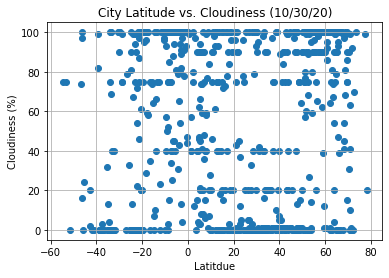

In [43]:
#LAT v Cloudiness

x_values = response_df['Lat']
y_values = response_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitdue')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/30/20)')
plt.grid(True, linestyle='-')
plt.show()

In [ ]:
# The code is plotting the latitude of cities against their cloudiness 
# at the time of sampling (10-30-2020, 11:50 pm PST). 
# The data do not describe a clear correlation between the two, suggesting
# that latitude does not predict cloudiness

## Latitude vs. Wind Speed Plot

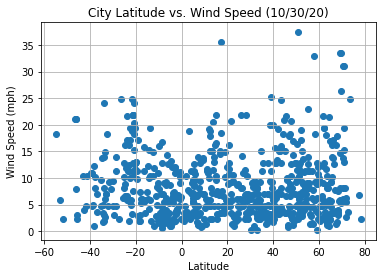

In [44]:
#Lat v Wind
x_values = response_df['Lat']
y_values = response_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/30/20)')
plt.grid(True, linestyle='-')
plt.show()

In [ ]:
# The code is plotting the latitude of cities against wind speed at the 
# time of sampling (10-30-2020, 11:50 pm PST). It shows that most 
# cities had a wind speed of under 31 mph which constitutes only a "strong 
# breeze" or less on the Beauford scale. Several outliers may have a light
# gale at the time of sampling, none were close to a storm (65 mph) or
# hurricane (75 mph or stronger)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8882255835727313


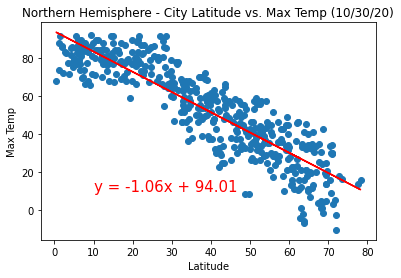

In [45]:
# Northern - Temp v Lat
north_df = response_df.loc[response_df["Lat"]>=0, :]

x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10, 10), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - City Latitude vs. Max Temp (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
# The code is plotting a line of linear regression over a scatter plot 
# of the latitude of cities in the Northern Hemisphere against 
# their Max Temp at the time of sampling (10-30-2020, 11:50 pm PST). 
# 
# The scatter plot seems to indicate that the higher the lower the 
# latitude (closer to the equator), the higher the Max temperature. This 
# is confirmed by the line of linear regression which has an r-value of 
# -0.89, which indicates that the cities closely follow this pattern.
# (The negative signals that the correlation has a negative slope, or 
# "the higher the latitude (x) the lower the temperature (y)")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6013484807180473


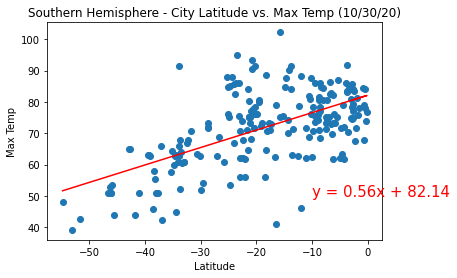

In [46]:
#Southern - Temp V Lat
south_df = response_df.loc[response_df["Lat"]<0, :]

x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-10, 50), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - City Latitude vs. Max Temp (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
# The code is plotting a line of linear regression over a scatter plot 
# of the latitude of cities in the Southern Hemisphere against 
# their Max Temp at the time of sampling (10-30-2020, 11:50 pm PST). 
# 
# Similar to the scatter plot for the Northern cities, this graph
# seems to indicate that the higher the lower the latitude (closer 
# to the equator), the higher the Max temperature. 

# This is confirmed by the line of linear regression. However, 
# r-value is only 0.60, which confirms the visual observation that these
# cities are less closely predicted by the regression equation. The data 
# appears to clump close to the equator, which may indicate a bias in 
# the sample data. Alternately, it may indicate that there is more 
# variation in the climates of the Southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3177107041579562


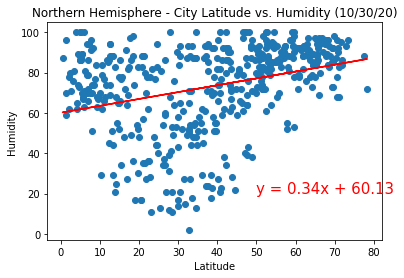

In [29]:
#North - Humidity v. Lat

x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - City Latitude vs. Humidity (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
# The code is plotting a line of linear regression over a scatter plot 
# of the latitude of cities in the Northern Hemisphere against 
# their Humidity at the time of sampling (10-30-2020, 11:50 pm PST). 
# 
# As observed on the map of lat v. humity globally, it seems to capture
# a concentration of humidity in near the equator and towards the pole 
# at the time of sampling. This data is not well captured by a linear 
# regression model (r-value = 0.37), suggesting there is not a direct
# relationship between humdity and latitude in the Northern Hemisphere. 


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22006463443109314


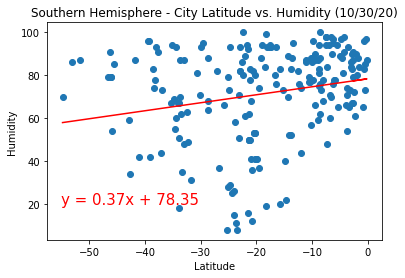

In [23]:
#South - Humidity v Lat

x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - City Latitude vs. Humidity (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
# The code is plotting a line of linear regression over a scatter plot 
# of the latitude of cities in the Southern Hemisphere against 
# their humidity at the time of sampling (10-30-2020, 11:50 pm PST). 
# 
# The scatter plot does not seem to demonstrate a clear pattern. It very
# loosely describes the pattern observed globally and in the Northern 
# hemisphere of high humidity near cities approaching the pole and equator
# and greater variation in between. 
# This is confirmed by the line of linear regression which has an r-value 
# of only 0.22, which indicates that the cities do not closely follow the 
# pattern described by the linear regression model. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19037480324286923


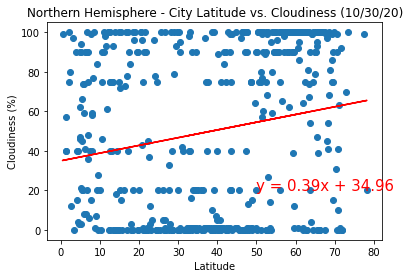

In [47]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - City Latitude vs. Cloudiness (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
# This code maps a linear regression on top of the scatter plot of Northern
# hemisphere cities (cloudiness vs. latitude). As discussed in previous 
# steps above, there is not a strong linear corelation between the variables.
# This is confirmed by the low r-value (0.19). Latitidue does not appear 
# to indicate cloudiness by this model.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.39395557693139494


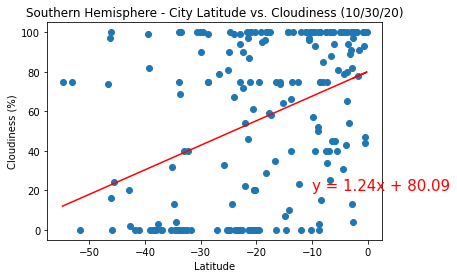

In [48]:
#South - Cloudiness v. Lat

x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-10, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - City Latitude vs. Cloudiness (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
# This code maps a linear regression on top of the scatter plot of Southern
# hemisphere cities (cloudiness vs. latitude). As discussed in previous 
# steps above, there is not a strong linear corelation between the variables.
# This is confirmed by the low r-value (0.39). Latitidue does not appear 
# to indicate cloudiness by this model.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1181862268104115


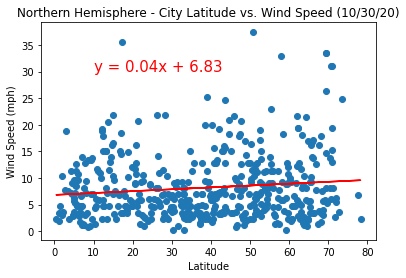

In [36]:
# North - wind speed v lat

x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10, 30), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - City Latitude vs. Wind Speed (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
# This models a linear regression path on a scatter plot of Northern
# cities (Lat by Wind Speed). There does not appear to be a linear relationship
# between wind speed and latitude in the Northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.23630213273021433


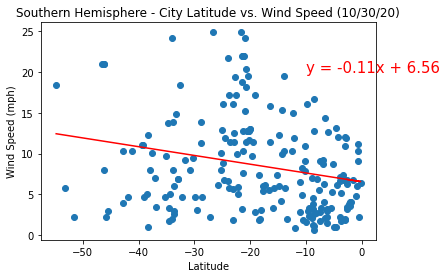

In [35]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-10, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - City Latitude vs. Wind Speed (10/30/20)')
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
# This models a linear regression path on a scatter plot of Southern
# cities (Lat by Wind Speed). There does not appear to be a linear relationship
# between wind speed and latitude in the Southern hemisphere.

In [ ]:
##FINAL OBSERVATIONS:
# weather patterns v. latitude
# distribution of cities
# humidity + cloudiness = precipitation? (there are rainforests at 
# many latitdues)